In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yfinance as yf
import statsmodels.api as sm

In [18]:
data = pd.read_csv('FAANG.csv',parse_dates=True)
data.index = pd.to_datetime(data.Date)
data.drop('Date',axis=1,inplace=True)
data

,FB,AMZN,AAPL,NFLX,GOOGL,FB_Ret,AMZN_Ret,AAPL_Ret,NFLX_Ret,GOOGL_Ret
Date,,,,,,,,,,
2012-05-18,38.23,213.85,16.37,9.99,300.50,NaN,NaN,NaN,NaN,NaN
2012-05-21,34.03,218.11,17.32,10.25,307.36,-0.109861,0.019921,0.058033,0.026026,0.022829
2012-05-22,31.00,215.33,17.19,9.67,300.70,-0.089039,-0.012746,-0.007506,-0.056585,-0.021668
2012-05-23,32.00,217.28,17.61,10.27,305.04,0.032258,0.009056,0.024433,0.062048,0.014433
2012-05-24,33.03,215.24,17.45,10.04,302.13,0.032188,-0.009389,-0.009086,-0.022395,-0.009540
...,...,...,...,...,...,...,...,...,...,...
2020-10-05,264.65,3199.20,116.50,520.65,1482.83,0.018120,0.023744,0.030791,0.034966,0.018707
2020-10-06,258.66,3099.96,113.16,505.87,1451.02,-0.022634,-0.031020,-0.028670,-0.028388,-0.021452
2020-10-07,258.12,3195.69,115.08,534.66,1459.14,-0.002088,0.030881,0.016967,0.056912,0.005596


In [19]:
### Get NASDAQ Return
nasdaq = yf.Ticker('^IXIC').history(period='max').Close
data['NASDAQ'] = nasdaq
data['NASDAQ_Ret'] = nasdaq.pct_change()
data

,FB,AMZN,AAPL,NFLX,GOOGL,FB_Ret,AMZN_Ret,AAPL_Ret,NFLX_Ret,GOOGL_Ret,NASDAQ,NASDAQ_Ret
Date,,,,,,,,,,,,
2012-05-18,38.23,213.85,16.37,9.99,300.50,NaN,NaN,NaN,NaN,NaN,2778.79,-0.012404
2012-05-21,34.03,218.11,17.32,10.25,307.36,-0.109861,0.019921,0.058033,0.026026,0.022829,2847.21,0.024622
2012-05-22,31.00,215.33,17.19,9.67,300.70,-0.089039,-0.012746,-0.007506,-0.056585,-0.021668,2839.08,-0.002855
2012-05-23,32.00,217.28,17.61,10.27,305.04,0.032258,0.009056,0.024433,0.062048,0.014433,2850.12,0.003889
2012-05-24,33.03,215.24,17.45,10.04,302.13,0.032188,-0.009389,-0.009086,-0.022395,-0.009540,2839.38,-0.003768
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,264.65,3199.20,116.50,520.65,1482.83,0.018120,0.023744,0.030791,0.034966,0.018707,11332.49,0.023248
2020-10-06,258.66,3099.96,113.16,505.87,1451.02,-0.022634,-0.031020,-0.028670,-0.028388,-0.021452,11154.60,-0.015697
2020-10-07,258.12,3195.69,115.08,534.66,1459.14,-0.002088,0.030881,0.016967,0.056912,0.005596,11364.60,0.018826


In [20]:
data.to_csv('FAANG_NASDAQ.csv')

### CAPM
risk-free rate = 1 YearTreasury Yield Curve Rates (at 2020/10/9)=  0.15%  

In [21]:
def capm(stock_name,color):
    # Convert 1 Year Rate to Daily Rate
    rf = (1+0.0015)**(1/360)-1
    
    #Prepare DataFrame
    stockRet = data[stock_name] - rf 
    marketRet = data['NASDAQ_Ret'] - rf
    excessReturn = pd.concat([stockRet,marketRet],axis=1)
    excessReturn.dropna(inplace=True)
    
    #Plot
    regressionPlot = sns.regplot(x=excessReturn.iloc[:,1], y=excessReturn.iloc[:,0],color=color)
    stock = stock_name.replace('_Ret','')
    regressionPlot.set_title('%s Regression Plot'%(stock))
    
    #OLS
    model = sm.OLS(excessReturn.iloc[:,0],sm.add_constant(excessReturn.iloc[:,1]))
    result = model.fit()

    # Add alpha beta on plot
    regressionPlot.text(marketRet.min(),stockRet.max(),'α = %.6f, β = %.6f'%(result.params[0],result.params[1]), fontsize=9)
    regressionPlot.text(marketRet.min(),stockRet.max()-0.05,'p-values: α = %.6f, β = %.3f'%(result.pvalues[0],result.pvalues[1]), fontsize=9)

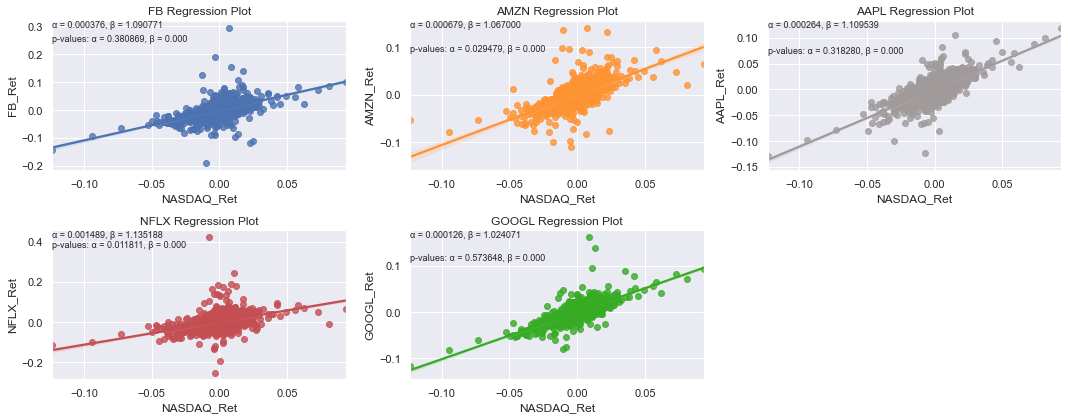

In [22]:
figure = plt.figure(figsize=(15,6))
color = ['r','b','#FF9333','#A09A9B','#36AB24']
ax1 = figure.add_subplot(231)
capm('FB_Ret','b')
ax2 = figure.add_subplot(232)
capm('AMZN_Ret','#FF9333')
ax3 = figure.add_subplot(233)
capm('AAPL_Ret','#A09A9B')
ax4 = figure.add_subplot(234)
capm('NFLX_Ret','r')
ax5 = figure.add_subplot(235)
capm('GOOGL_Ret','#36AB24')
plt.tight_layout()
figure.savefig('FAANG_CAPM.png')